<a href="https://colab.research.google.com/github/owenburton/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [3]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# Importing libraries
import pandas as pd

# Loading the data as dataframe "df"
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


#What's going on here, really?
###This as a summary of what I found using the code below.

- I could use exercise time as my target, or y variable. Age and weight are the independent, or x variables. 
- There's a general inverse relationship between weight and exercise time.
- Here, age may be a confounding variable, because there are certain spikes in exersize time that don't follow the otherwise downward trend as one ages. Specifically, people start exercising a bit more in middle age, which skews things a tad. 
- You can see these observations illustrated by the following crosstabs and graphs.

In [19]:
# Installing older version of pandas.
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [3]:
# My hypothesis is that age and weight have a linear relationship, while age and exercise time have an inverse relationship. 
# It follows from my hypothesis that weight and exercize time have an inverse relationship as well.

# Checking to see if I have the older version.
import pandas as pd
pd.__version__

'0.23.4'

In [44]:
# Loading the data
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

# Making it easier to "see" the data by grouping each feature in intervals.
age_bins = pd.cut(df.age, 6)
weight_bins = pd.cut(df.weight, 6)
exercise_time_bins = pd.cut(df.exercise_time, 6)

# Creating a crosstab of the weight and age features as percents.
pd.crosstab(age_bins, weight_bins, normalize='columns')

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 28.333]",0.190476,0.187500,0.189723,0.136905,0.140845,0.128205
"(28.333, 38.667]",0.238095,0.161184,0.173913,0.166667,0.154930,0.102564
"(38.667, 49.0]",0.166667,0.210526,0.154150,0.130952,0.147887,0.128205
"(49.0, 59.333]",0.170068,0.164474,0.130435,0.166667,0.154930,0.025641
"(59.333, 69.667]",0.102041,0.157895,0.173913,0.190476,0.204225,0.230769
"(69.667, 80.0]",0.132653,0.118421,0.177866,0.208333,0.197183,0.384615


- In the results above you can see one is more likely to be old if they are heavy. Generally, the older, the heavier.

In [45]:
# Crosstab with weight and exercise time.
pd.crosstab(exercise_time_bins, weight_bins, normalize='columns')

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.115646,0.121711,0.146245,0.279762,0.366197,0.871795
"(50.0, 100.0]",0.142857,0.154605,0.249012,0.267857,0.436620,0.128205
"(100.0, 150.0]",0.173469,0.088816,0.193676,0.244048,0.183099,0.000000
"(150.0, 200.0]",0.173469,0.203947,0.173913,0.184524,0.014085,0.000000
"(200.0, 250.0]",0.156463,0.207237,0.166008,0.023810,0.000000,0.000000
"(250.0, 300.0]",0.238095,0.223684,0.071146,0.000000,0.000000,0.000000


- Above you can see that longer exercise times decrease as weight increases.

In [47]:
# Crosstab with age and exercise time.
pd.crosstab(exercise_time_bins, age_bins, normalize='columns')

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.138756,0.221198,0.135,0.141304,0.229167,0.338384
"(50.0, 100.0]",0.167464,0.147465,0.200,0.163043,0.276042,0.373737
"(100.0, 150.0]",0.157895,0.133641,0.125,0.157609,0.171875,0.227273
"(150.0, 200.0]",0.215311,0.193548,0.130,0.157609,0.187500,0.060606
"(200.0, 250.0]",0.186603,0.156682,0.180,0.130435,0.114583,0.000000
"(250.0, 300.0]",0.133971,0.147465,0.230,0.250000,0.020833,0.000000


- The crosstab above shows that older people are less likely to exercise for long periods. 

In [0]:
# Triple crosstab is weird. Not sure how to make it useful.
# pd.crosstab([age_bins, exercise_time_bins], weight_bins, normalize='columns')

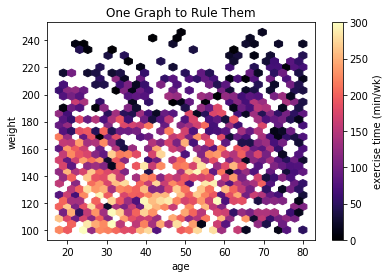

In [91]:
# A hexbin plot to represent many of the previous observations.
plot = df.plot.hexbin(x='age', 
               y='weight', 
               C='exercise_time',
               gridsize=30,
               title='One Graph to Rule Them',
               cmap='magma',
               sharex=False
              );
# Apparently have to access the colorbar?
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('exercise time (min/wk)');


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. They're all continuous. I've deemed the exercise_time variable to be dependent in my graph.
2. Weight and age have an inverse relationship. There are more heavy old people than heavy young people. Exercise time decreases as a person gets older or heavier.
3. The relationship between exercise time and weight is "real". The relationship between exercise time and age is "real". The relationship between age and weight is more spurious, or they're associated but not necessarilly causally related.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)